# Milestone 1

In [98]:
import Cosserat
from Cosserat import cosserat_rod
import numpy as np
from matplotlib import pyplot as plt

# for updates
import importlib
importlib.reload(Cosserat)

'''Define rod'''
# 1 element rod
tot_length = 3
n_elements = 10
n_nodes = n_elements + 1

element_length = tot_length/n_elements
r_o = np.vstack((np.zeros((2,n_nodes)),np.arange(0.0, tot_length+element_length, element_length)))

Q_o = np.zeros((3, 3, n_elements))
L = r_o[:, 1:] - r_o[:, :-1]
L_norm = np.linalg.norm(L, axis=0, keepdims=True)
Q_o[2] = L/L_norm
Q_o[1] = [[0]*n_elements, [1]*n_elements, [0]*n_elements]
Q_o[0] = np.cross(Q_o[1], Q_o[2], axis = 0)

v_o = np.zeros((3, n_nodes))
w_o = np.zeros((3, n_elements))
rad = 0.25
rho = 5E3
E = 1E6
G = 1E4
lock_e = False
force = 15
ext_force = np.zeros((3, n_nodes))
ext_force[-1, -1] = force
ext_couples = np.zeros((3, n_elements))
stretch_case = cosserat_rod(r_o, Q_o, v_o, w_o, n_elements, rad, rho, E, G, lock_e, 1, ext_force, ext_couples)

C:\Users\lukel\Desktop\ME 447\Project 2\Cosserat.py:81: RuntimeWarning: invalid value encountered in true_divide
  K = (R-np.transpose(R, (1,0,2)))/(2.0*np.sin(angle))


Average end displacement (m): 0.0002296892307572194

Theoretical end displacement (m): 0.00022920062769050053



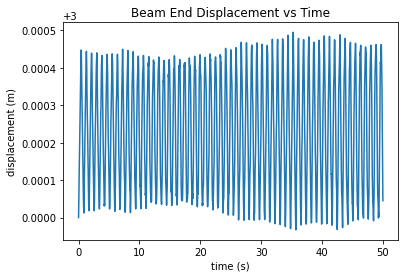

In [99]:
'''Control simulation'''
t_total = 50
dt = 3E-4
n_iterations = int(np.ceil(t_total/dt))
dx_history = np.zeros(n_iterations,)

for time_step in range(n_iterations):
    stretch_case.step(dt)
    r, = stretch_case.get_state('r')
    dx_history[time_step] = r[-1,-1]

time_history = np.arange(0, t_total, dt)
plt.figure()
plt.plot(time_history, dx_history)
plt.title("Beam End Displacement vs Time")
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')

print('Average end displacement (m): ', end = '')
print(np.mean(dx_history - tot_length))
print()
print('Theoretical end displacement (m): ', end = '')
print(force*tot_length/(E*np.pi*rad*rad - 15))
print()